In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import Sequential, layers

In [16]:
dataset_train= pd.read_csv(r'C:\Users\Hari\Downloads\archive (1)\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

In [17]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [18]:
dataset_train.tail()
dataset_train.shape

(1258, 6)

In [20]:
dataset = pd.read_csv(r'C:\Users\Hari\Downloads\archive (1)\Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)

In [21]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [22]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
regressor = Sequential() 
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [26]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')   

In [27]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 8s 57ms/step - loss: 0.0478
Epoch 2/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0064
Epoch 4/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0054
Epoch 10/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0048
Epoch 13/100
38/38 [=====

38/38 [==============================] - 4s 101ms/step - loss: 0.0017


In [28]:
dataset_test= pd.read_csv(r'C:\Users\Hari\Downloads\archive (1)\Google_Stock_Price_Train.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [29]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[ len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [30]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])

X_test= np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


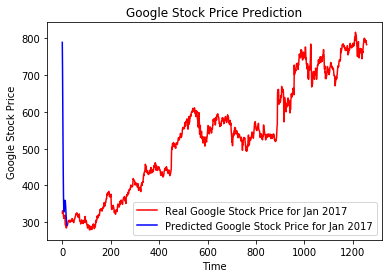

In [31]:
plt.plot(real_stock_price,color='red', label='Real Google Stock Price for Jan 2017')
plt.plot(predicted_stock_price,color='blue', label='Predicted Google Stock Price for Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()